# What is Bias and Variance ?


## Graphical Defination:
<img src="Images/Graph_Def.jpg" width="50%">


## Mathametical Defination:

If we denote the variable we are trying to predict as $Y$ and our covariates as $X$, we may assume that there is a relationship relating one to the other such as $Y=f(X)+ϵ$ where the error term $ϵ$ is normally distributed with a mean of zero like so $ϵ∼N(0,σϵ)$

We may estimate a model $f'(X)$ of $f(X)$ using linear regressions or another modeling technique. In this case, the expected squared prediction error at a point $x$ is:

\begin{equation}
  Err(x)= E\left[(Y-f'(X))^2\right]
\end{equation}

This error rate is further divided into bias and variance as:


\begin{equation}
  Err(x)=  \left[ E(f'(X)-f(x)\right]^2 + E \left[ ( (f'(X)-E\left[f(x)
  \right] )^2\right] + {\sigma_{e}}^2
\end{equation}



\begin{equation}
  Err(x)=  Bias^2 + Variance + Irreducible Error
\end{equation}

## Conceptual Defination:

### High Bias (Underfit )
<img src="Images/High_Bias.jpg" width="50%">
\begin{equation}
 \theta_{0} + \theta_{1}X
\end{equation}


### Just Right
<img src="Images/Just_right.jpg" width="50%">
\begin{equation}
 \theta_{0} + \theta_{1}X + \theta_{2}X^2 
\end{equation}

### High Variance
<img src="Images/High_Var.jpg" width="50%">
\begin{equation}
 \theta_{0} + \theta_{1}X + \theta_{2}X^2 + \theta_{3}X^3 + \theta_{4}X^4 + \theta_{5}X^5+\theta_{6}X^6    
\end{equation}

# Bias - Variance Tredoff:
<img src="Images/Tredoff.png" width="40%">

## Bias-variance tredoff exploration


### Let create some interesting data

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

In [3]:
def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)

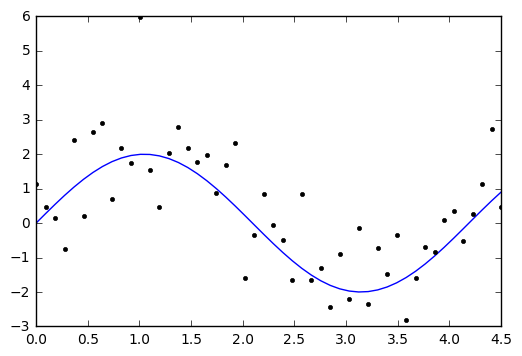

In [4]:
plt.clf()
f_x, f_y = f(50)
plt.plot(f_x, f_y)
x, y = sample(50)
plt.plot(x, y, 'k.')

## Model Fitting

In [5]:
# This illustrates how vander function works:
x1 = np.array([1,2,3])

print(np.vander(x1, 4))

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]]


In [6]:
from sklearn.linear_model import LinearRegression


In [7]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

In [8]:
def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y


In [9]:
def FitSignWave(degree):
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    plt.plot(f_x, f_y)
    plt.plot(x, y, 'k.')
    plt.plot(x, p_y)


In [10]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

C:\Program Files\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


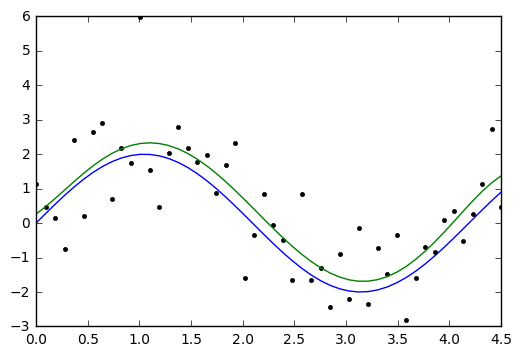

In [11]:
i = interact(FitSignWave, degree=(1,10))

## Model averaging
The following code generates a set of samples of the same size and fits a poynomial to each sample. Then the average model is calculated. All the models, including the average model, are plotted.

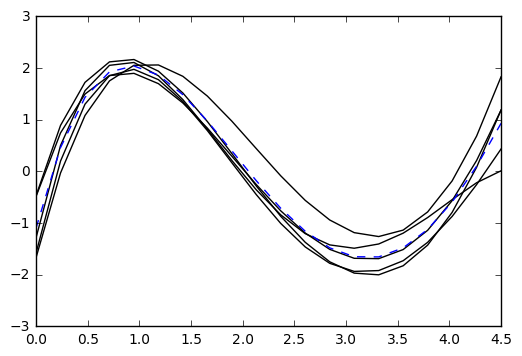

In [12]:
degree = 4
n_samples = 20
n_models = 5
avg_y = np.zeros(n_samples)
for i in range(n_models):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    plt.plot(x, p_y, 'k-')
avg_y = avg_y / n_models
plt.plot(x, avg_y, 'b--')

## Calculating bias and variance
Same as previous example, we generate several samples and fit a polynomial to each one. We calculate bias an variance among models for different polynomial degrees. Bias, variance and error are plotted against different degree values.

In [13]:
from numpy.linalg import norm

def BiasVarianceTredoff(n_samples,n_models,max_degree):
    
    f_x, f_y = f(n_samples)
    var_vals =[]
    bias_vals = []
    error_vals = []
    for degree in range(1, max_degree):
        avg_y = np.zeros(n_samples)
        models = []
        for i in range(n_models):
            (x,y) = sample(n_samples)
            model = fit_polynomial(x, y, degree)
            p_y = apply_polynomial(model, x)
            avg_y = avg_y + p_y
            models.append(p_y)
        avg_y = avg_y / n_models
        bias_2 = norm(avg_y - f_y)/f_y.size
        bias_vals.append(bias_2)
        variance = 0
        for p_y in models:
            variance += norm(avg_y - p_y)
        variance /= f_y.size * n_models
        var_vals.append(variance)
        error_vals.append(variance + bias_2)
    plt.plot(range(1, max_degree), bias_vals, label='bias')
    plt.plot(range(1, max_degree), var_vals, label='variance')
    plt.plot(range(1, max_degree), error_vals, label='error')
    plt.legend()



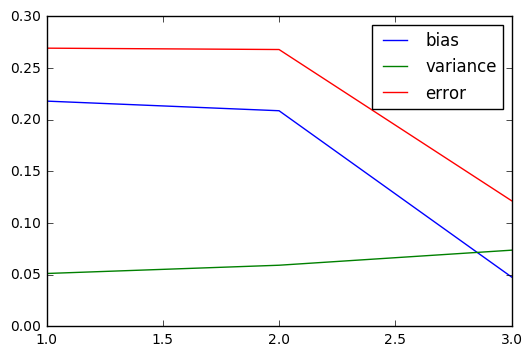

In [14]:
i = interact(BiasVarianceTredoff, n_samples=(10,40),n_models=(10,100), max_degree=(2,15))